# <center>scikit-learn<center>
官网： https://scikit-learn.org/stable/
    
scikit-learn (sklearn) 官方文档中文版
https://sklearn.apachecn.org/docs/0.21.3/    
    
    

Scikit-learn是一个Python模块，它将科学计算的Python包(NumPy, SciPy, matplotlib)集成到了一起。

In [1]:
# Create and save reports
import json
import os

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, fbeta_score)

def get_metrics(y, y_pred, beta=2, average_method='macro', y_encoder=None):
    if y_encoder:
        y = y_encoder.inverse_transform(y)
        y_pred = y_encoder.inverse_transform(y_pred)
    return {
        'accuracy': round(accuracy_score(y, y_pred), 4),
        'f1_score_macro': round(f1_score(y, y_pred, average=average_method), 4),
        'fbeta_score_macro': round(fbeta_score(y, y_pred, beta, average=average_method), 4),
        'report': classification_report(y, y_pred, output_dict=True),
        'report_csv': classification_report(y, y_pred, output_dict=False).replace('\n','\r\n')
    }


def save_metrics(metrics: dict, model_directory, file_name):
    path = os.path.join(model_directory, file_name + '_report.txt')
    classification_report_to_csv(metrics['report_csv'], path)
    metrics.pop('report_csv')
    path = os.path.join(model_directory, file_name + '_metrics.json')
    json.dump(metrics, open(path, 'w'), indent=4)

### <center>标签处理<center>

### MultiLabelBinarizer

In [1]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform([(1, 2), (3,4),(5,)])

array([[1, 1, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)
mlb.fit_transform([set(['sci-fi', 'thriller']), set(['comedy'])]).toarray()

array([[0, 1, 1],
       [1, 0, 0]])

### preprocessing.LabelEncoder()
-标准化标签，将标签值统一转换成range(标签值个数-1)范围内

In [2]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
d_col = ["Japan", "china", "Japan", "Korea", "china"]
le.fit(d_col)
print('标签个数:%s' % le.classes_)
print('标签值标准化:%s' % le.transform(["Japan", "china", "Japan", "Korea", "china"]))
print(le.fit_transform(d_col))
print('标准化标签值反转:%s' % le.inverse_transform([0, 2, 0, 1, 2]))

标签个数:['Japan' 'Korea' 'china']
标签值标准化:[0 2 0 1 2]
[0 2 0 1 2]
标准化标签值反转:['Japan' 'china' 'Japan' 'Korea' 'china']


In [32]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv(r"./data/le.csv")  # DataFrame

In [31]:
cols = ['C1',
        'site_domain',
        'site_id',
        'site_category']

X = df[cols[1:]]  # training dataset
# label encode
lbl = preprocessing.LabelEncoder()
site_domain = lbl.fit_transform(X['site_domain'].astype(str)) # 将提示的包含错误数据类型这一列进行转换
site_domain

array([7, 7, 7, 7, 3, 5, 1, 2, 7, 6, 2, 7, 0, 5, 6, 7, 4, 7])

### 独热编码 OneHotEncoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[1, 1, 4], [2, 2, 1], [1, 3, 2], [2, 1, 3]])  # 三个特征，每个特征的取值可能分别有2，3，4，所以onehot编码的长度为2+3+4
enc.transform([[1, 1, 4], [2, 2, 1], [1, 3, 2], [2, 1, 3]]).toarray()

/home/ginger/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

### <center>数据生成<center>

In [6]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
X

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

<module 'matplotlib.pyplot' from '/home/ginger/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

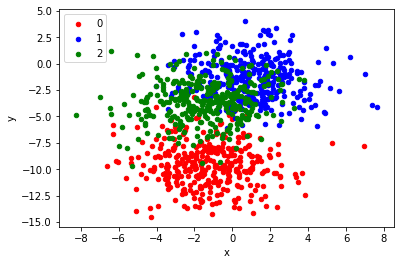

In [7]:
"""样本展示"""
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot

### Bunch

In [8]:
from sklearn.datasets import base

buch = base.Bunch(A=1,B=2,c=3)
buch

{'A': 1, 'B': 2, 'c': 3}

### <center>数据预处理<center>
- https://www.zhihu.com/question/28641663

In [13]:
# iris 数据集
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [11]:
#区间缩放法，返回值为缩放到[0, 1]区间的数据
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit_transform(iris.data)
minmax[0]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [14]:
# 归一化
from sklearn.preprocessing import Normalizer
print(Normalizer().fit_transform(iris.data)[0])

[0.80377277 0.55160877 0.22064351 0.0315205 ]


In [15]:
# 标准化
from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(iris.data)[0])

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


# <center>classfier</center>

### 贝叶斯分类器
https://www.cnblogs.com/JosonLee/p/10053716.html

### <center>混淆矩阵<center>

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
#y_true代表真实的label值 y_pred代表预测得到的lavel值
y_true = np.loadtxt('./data/yt.txt')
y_pred = np.loadtxt('./data/yp.txt')
y_true

array([1., 2., 3., 2., 1., 2.])

In [20]:
cm = confusion_matrix(y_true, y_pred)  # y_true:ndarray
cm

array([[2, 0, 0],
       [0, 2, 1],
       [0, 0, 1]])

In [22]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[1.        , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 1.        ]])

### 可视化混淆矩阵

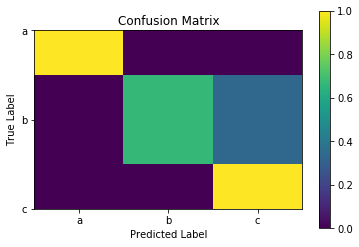

In [24]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    labels = ['a', 'b', 'c']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
plot_confusion_matrix(cm_normalized)

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
# create X (features) and y (response)
X = iris.data
y = iris.target

### <center>参数搜索<center>
- 网格搜索
- RandomizeSearchCV用于解决多个参数的搜索过程中计算代价过高的问题   

In [1]:
# define the parameter values that should be searched
k_range =[i for i in range(1, 31)]
# create a parameter grid: map the parameter names to the values that should be searched
# 下面是构建parameter grid，其结构是key为参数名称，value是待搜索的数值列表的一个字典结构
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=5)
# instantiate the grid
# 这里GridSearchCV的参数形式和cross_val_score的形式差不多，其中param_grid是parameter grid所对应的参数
# GridSearchCV中的n_jobs设置为-1时，可以实现并行计算（如果你的电脑支持的情况下）
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# 我们可以知道，这里的grid search针对每个参数进行了10次交叉验证，并且一共对30个参数进行相同过程的交叉验证
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [2]:
grid.best_estimator_  # 最优参数

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

##### 线性回归

In [18]:
X = [[6,2,1], [8,3,1], [10,4,1], [14,5,1], [18,6,1]]
y = [[7], [9], [13], [17.5], [18]]

from sklearn import linear_model        #表示，可以调用sklearn中的linear_model模块进行线性回归。
import numpy as np
model = linear_model.LinearRegression()
history = model.fit(X, y)
history

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
display(model.coef_)  #线性模型的系数

array([[-0.32142857,  4.01428571,  0.        ]])

In [20]:
y_predict=model.predict(X)
from sklearn import metrics
metrics.mean_squared_error(y,y_predict)

0.7771428571428578

In [28]:
X = [[6,2,1,4], [8,3,1,4], [10,4,1,5], [14,5,1,8], [18,6,1,9]]
y = [[1,2], [2,3], [1,3], [3,2], [2,1]]

from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
clf.predict(X)

# from sklearn.naive_bayes import MultinomialNB
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X, y)
# knn_clf.predict(X)
# KNeighborsClassifier

ValueError: bad input shape (5, 2)

### <center>交叉验证<center>
    https://blog.csdn.net/xiaodongxiexie/article/details/71915259

In [3]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:

from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
NB_clf.fit(X_train, y_train)
# 分类测试集，这将返回一个测试结果的数组
y_pred = NB_clf.predict(X_test)
# 计算模型在测试集上的准确性
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

In [15]:
# 默认方式
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [16]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=.3, random_state=0)
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.97777778, 0.97777778, 1.        ])

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [36]:
sklearn?
# X1=[0,1,2,1,1,2,0,3,9]
# X2=[3,3,3,1,1,0,1,3,3]
 
# model = hmm.MultinomialHMM(n_components=4)
# model.n_symbols=10
# model.fit([X1,X2],n_iter=100)
# model.eval(X1)

Object `sklearn` not found.


### feature selection

In [2]:
# 方差
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

#####  使用 SelectFromModel 选取特征

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [4]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.13865246, 0.04920264, 0.29124342, 0.52090148])

In [5]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

In [6]:
191*3

573

In [7]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

### class_weight和sample_weight

class_weight='balanced'
``n_samples / (n_classes * np.bincount(y))``
https://www.cnblogs.com/qi-yuan-008/p/11992156.html

In [8]:
import numpy as np

y = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2]  #标签值，一共16个样本

a = np.bincount(y)  # array([8, 6, 2], dtype=int64) 计算每个类别的样本数量
aa = 1/a  #倒数 array([0.125     , 0.16666667, 0.5       ])
print(aa)

from sklearn.utils.class_weight import compute_class_weight 
class_weight = 'balanced'
classes = np.array([0, 1, 2])  #标签类别
weight = compute_class_weight(class_weight, classes, y)
print(weight) # [0.66666667 0.88888889 2.66666667]

print(0.66666667*8)  #5.33333336
print(0.88888889*6)  #5.33333334
print(2.66666667*2) #5.33333334
# 这三个值非常接近
# 'balanced'计算出来的结果很均衡，使得惩罚项和样本量对应

[0.125      0.16666667 0.5       ]
[0.66666667 0.88888889 2.66666667]
5.33333336
5.33333334
5.33333334


In [9]:
import numpy as np

y = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2]  #标签值，一共16个样本

from sklearn.utils.class_weight import compute_class_weight 
class_weight = {0:1,1:3,2:5}   # {class_label_1:weight_1, class_label_2:weight_2, class_label_3:weight_3}
classes = np.array([0, 1, 2])  #标签类别
weight = compute_class_weight(class_weight, classes, y)
print(weight)   # 输出：[1. 3. 5.]，也就是字典中设置的值

[1. 3. 5.]


### 聚类

In [ ]:
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', ...
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

### 特征选择/降维

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the data
digits_data = datasets.load_digits()
n = len(digits_data.images)

# Each image is represented as an 8-by-8 array.
# Flatten this array as input to PCA.
image_data = digits_data.images.reshape((n, -1))
image_data.shape(1797, 64)

# Groundtruth label of the number appearing in each image
labels = digits_data.target
labels
array([0, 1, 2, ..., 8, 9, 8])
# Fit a PCA transformer to the dataset.
# The number of components is automatically chosen to account for
# at least 80% of the total variance.
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_
array([ 0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
    0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806
,
    0.02372341, 0.02272697, 0.01821863])
pca_transformer.explained_variance_ratio_[:3].sum()
0.40303958587675121

# Visualize the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2],
    marker=r'![{}](../images/tex-99914b932bd37a50b983c5e7c90ae93b.gif)'.format(labels[i]), s=64)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')